<a href="https://colab.research.google.com/github/Kva-Ch/AI-Project/blob/main/AI%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package nps_chat to /root/nltk_data...
[nltk_data]   Package nps_chat is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Greet
Bye


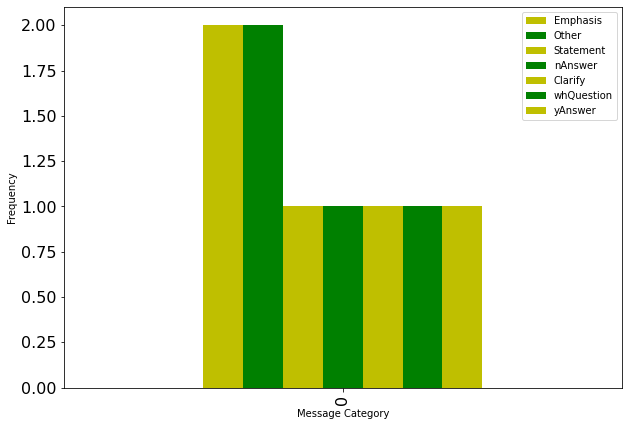

In [ ]:
import nltk
from pandas import DataFrame as df
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#inputdata ie., exportedchat
content = ["[02/07/2017, 5:47:33 pm] Person_1: Hey there! This is the first message",
 "[02/07/2017, 5:48:24 pm] Person_1: This is the second message",
 "[02/07/2017, 5:48:44 pm] Person_1: Third…",
 "[02/07/2017, 8:10:52 pm] Person_2: Hey Person_1! This is the fourth message",
 "[02/07/2017, 8:14:11 pm] Person_2: Fifth …etc",
 "29/05/21, 2:14 am - Shuruth@vce: will you go to movie",
 "29/05/21, 2:14 am - Shuruth@vce: will you eat food",
 "29/05/21, 2:14 am - Shuruth@vce: who are you",
 "29/05/21, 2:14 am - KvaCh: Yeah why won't i",
 "29/05/21, 2:14 am - Shuruth@vce: where are you",
 "29/05/21, 2:14 am - KvaCh: Don't you eat it",
 "29/05/21, 2:14 am - Shuruth@vce: what is your name",
 "29/05/21, 2:14 am - Shuruth@vce: i dont eat food",
 "29/05/21, 2:15 am - Shuruth@vce: i eat grass",
 "29/05/21, 2:15 am - KvaCh: Are u a new born kid?"]
ppl=defaultdict(list)

for line in content:
    try:
        person = line.split(':')[2][7:]
        text = nltk.sent_tokenize(':'.join(line.split(':')[3:]))
        ppl[person].extend(text)   # If key exists (person), extend list with value (text),
                                   # if not create a new key, with value added to list
    except:
        print(line)  # in case reading a line fails, examine why
        pass
nltk.download('nps_chat')
nltk.download('punkt')
posts = nltk.corpus.nps_chat.xml_posts()

def extract_features(post):
    features = {}
    for word in nltk.word_tokenize(post):
        features['contains({})'.format(word.lower())] = True
    return features

fposts = [(extract_features(p.text), p.get('class')) for p in posts]
test_size = int(len(fposts) * 0.1)
train_set, test_set = fposts[test_size:], fposts[:test_size]
classifier = nltk.NaiveBayesClassifier.train(train_set)
print(classifier.classify(extract_features('Hi there!')))
print(classifier.classify(extract_features('film later')))

# running the model on WhatsApp data for counting 
#the occurrences of each category of the tokenized conversations:
s1= pd.Series([classifier.classify(extract_features(i)) for i in content])
dff= pd.DataFrame(s1)
dff=dff.apply(pd.value_counts)
ax=dff.T.plot(kind='bar', figsize=(10, 7), legend=True, fontsize=16, color=['y','g'])
ax.set_xlabel("Message Category")
ax.set_ylabel("Frequency")
plt.show()